<a href="https://colab.research.google.com/github/yagnik99/Funds-Prediction-for-a-Startup/blob/main/Yagnik_Pandya_Capstone_Project_4_Startup_Funding_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - Avg session time / user x Open rate = Total session time
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/Capstone Project 4/data/'

In [ ]:
O_data = pd.read_csv(folder + 'data_driven_investment_1.csv')

In [ ]:
O_data.head(3)

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0


In [ ]:
# Shape of Original Dataset
O_data.shape

(1502175, 20)

In [ ]:
O_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502175 entries, 0 to 1502174
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   UUID                  1500693 non-null  object 
 1   month                 1502175 non-null  int64  
 2   Application Category  1502175 non-null  object 
 3   Avg_Session_Time      877732 non-null   float64
 4   Business Models       2414 non-null     object 
 5   City                  2407 non-null     object 
 6   Company Stage         2414 non-null     object 
 7   Feed Name             2414 non-null     object 
 8   Founded Year          2414 non-null     float64
 9   Latest Funded Date    2414 non-null     object 
 10  MAU                   118087 non-null   float64
 11  Open_Rate             877715 non-null   float64
 12  Overview              2414 non-null     object 
 13  Practice Areas        2414 non-null     object 
 14  Reach                 1050875 non-

In [ ]:
#Count of Funded Startups
O_data['funding_ind'].value_counts()

0    1499761
1       2414
Name: funding_ind, dtype: int64

In [ ]:
# Checking for duplicates
len(O_data[O_data.duplicated()])

89412

In [ ]:
#Droping Duplicates
O_data.drop_duplicates(inplace=True)

In [ ]:
O_data.isna().sum()

UUID                        969
month                         0
Application Category          0
Avg_Session_Time         535031
Business Models         1410459
City                    1410466
Company Stage           1410459
Feed Name               1410459
Founded Year            1410459
Latest Funded Date      1410459
MAU                     1294676
Open_Rate                535048
Overview                1410459
Practice Areas          1410459
Reach                    451300
Region                        0
Total Funding (USD)     1410605
Total_Session_Time       535098
Uninstall_Rate          1060560
funding_ind                   0
dtype: int64

###Checking where there is no UUID and droping those if no funds recieved as it will be of no use. 

In [ ]:
# Where UUID is null
len(O_data[O_data['UUID'].isna()])

969

In [ ]:
# Subset of data where UUID is not null
O_data = O_data[O_data['UUID'].notna()]

In [ ]:
# Duration of Data
print(O_data['month'].min(),'- start')
print(O_data['month'].max(), '- end')

20180701 - start
20200601 - end


In [ ]:
# Copy of Data for future use
data = O_data.copy()

In [ ]:
# Features that are only for funded Start up
Funded_features = ['Business Models', 'City', 'Company Stage', 'Feed Name', 'Founded Year', 'Latest Funded Date', 'MAU', 'Overview', 'Practice Areas', 'Total Funding (USD)', 'Uninstall_Rate']

In [ ]:
data.drop(Funded_features, axis = 1, inplace=True)

In [ ]:
data.shape

(1411794, 9)

In [ ]:
data.isna().sum()

UUID                         0
month                        0
Application Category         0
Avg_Session_Time        534728
Open_Rate               534745
Reach                   450918
Region                       0
Total_Session_Time      534795
funding_ind                  0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1411794 entries, 0 to 1502174
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   UUID                  1411794 non-null  object 
 1   month                 1411794 non-null  int64  
 2   Application Category  1411794 non-null  object 
 3   Avg_Session_Time      877066 non-null   float64
 4   Open_Rate             877049 non-null   float64
 5   Reach                 960876 non-null   float64
 6   Region                1411794 non-null  object 
 7   Total_Session_Time    876999 non-null   float64
 8   funding_ind           1411794 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 107.7+ MB


### Many null values in above so will try to find out if there is any pattern of those missing values.

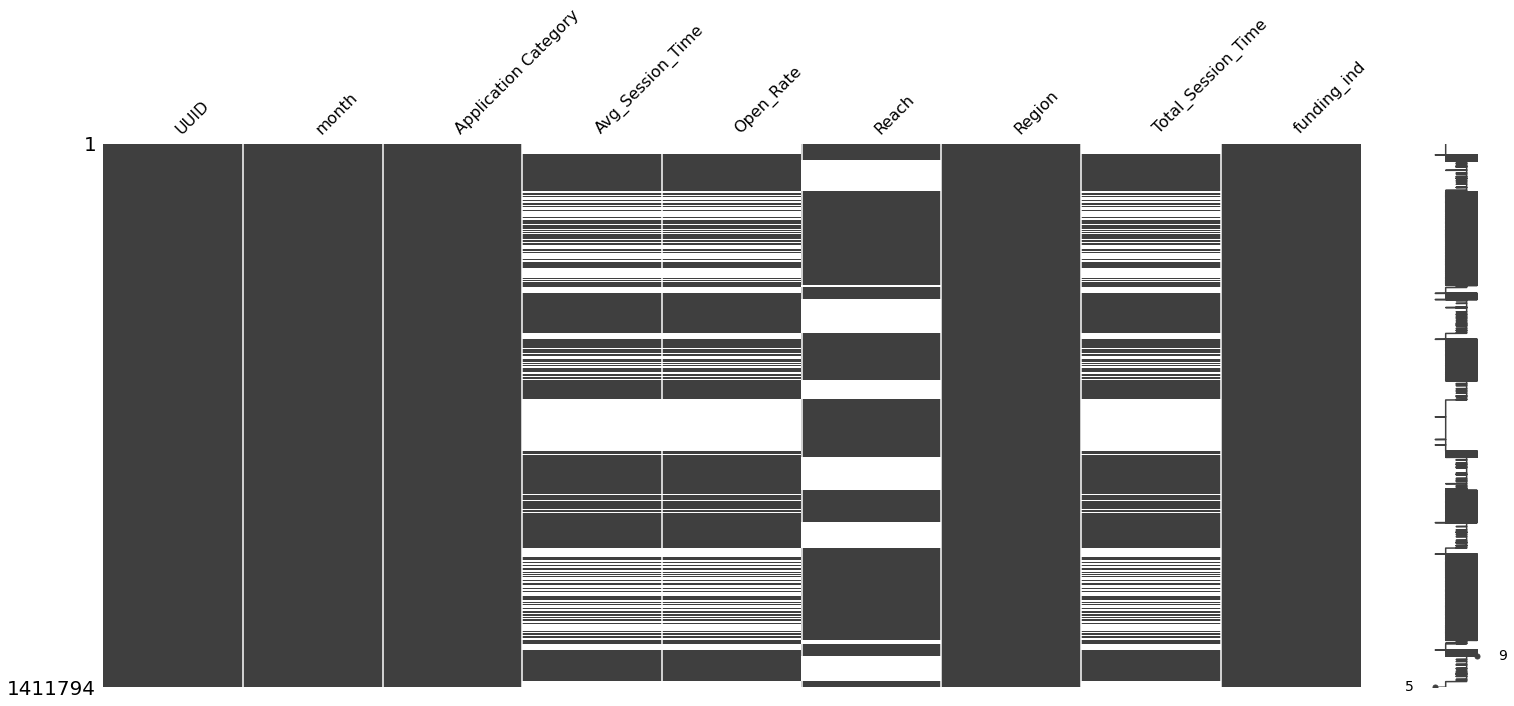

In [ ]:
# Identifying patter in missing values
import missingno as msno
msno.matrix(data)

In [ ]:
data['Year'] = data['month'].apply(lambda x : (int(str(x)[:4])))
data['Month'] = data['month'].apply(lambda x : (int(str(x)[4:6])))
#data['Day'] = data['month'].apply(lambda x : (int(str(x)[6:])))   - All are of 1st day of month

In [ ]:
data.drop(['month', 'Region'], axis=1, inplace = True)

In [ ]:
# Subset of funded statups for EDA
Funded = data[data['funding_ind']==1]

In [ ]:
# Subset of Non Funded startups for EDA
Non_funded = data[data['funding_ind']==0]

In [ ]:
# Impute missing values
def fill_missing(dataframe):
  new_data = pd.DataFrame(columns=dataframe.columns)              # First will impute missing values with forward and back fill.
  Category_list = dataframe['Application Category'].value_counts().index.to_list()
  years = dataframe['Year'].value_counts().index.to_list()
  for i in Category_list:
    temp = dataframe[dataframe['Application Category']==i]
    for y in years:
      temp1 = temp[temp['Year']==y]
      temp1.fillna(method='ffill', limit = 2, inplace = True)
      temp1.fillna(method='backfill', limit = 1, inplace = True)
      new_data = pd.concat([new_data, temp1])
  
  new_data_1 = pd.DataFrame(columns=dataframe.columns)            # Remaining imputed with mean of category and year.
  for i in Category_list:
    temp = new_data[new_data['Application Category']==i]
    for y in years:
      temp1 = temp[temp['Year']==y]
      temp1.fillna(temp1.mean(), inplace = True)
      new_data_1 = pd.concat([new_data_1, temp1])

  Final_data = pd.DataFrame(columns=dataframe.columns)            # Still remaining imputed with mean of whole category.
  for i in Category_list:
    temp = new_data_1[new_data_1['Application Category']==i]
    temp.fillna(temp.mean(), inplace = True)
    Final_data = pd.concat([Final_data, temp])

  return Final_data

In [ ]:
# Removing missing values in funded
Funded = fill_missing(Funded)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/

In [ ]:
# Removing missing values in Non funded
Non_funded = fill_missing(Non_funded)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/

In [ ]:
# Filling rest missing values with overall mean
Funded.fillna(Funded.mean(), inplace = True)

In [ ]:
Final_data = pd.concat([Funded, Non_funded])

In [ ]:
Final_data.shape

(1411794, 9)

In [ ]:
# Saving data sets for future easy use purpose
Final_data.to_csv(folder + 'Final_dataset.csv', index= False)
Funded.to_csv(folder + 'Funded_dataset.csv', index= False)
Non_funded.to_csv(folder + 'Non_funded_dataset.csv', index= False)

In [ ]:
# Importing saved DF
Funded_df = pd.read_csv(folder + 'Funded_dataset.csv')
Non_funded_df = pd.read_csv(folder + 'Non_funded_dataset.csv')

In [ ]:
Funded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UUID                  2304 non-null   object 
 1   Application Category  2304 non-null   object 
 2   Avg_Session_Time      2304 non-null   float64
 3   Open_Rate             2304 non-null   float64
 4   Reach                 2304 non-null   float64
 5   Total_Session_Time    2304 non-null   float64
 6   funding_ind           2304 non-null   int64  
 7   Year                  2304 non-null   int64  
 8   Month                 2304 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 162.1+ KB


##**EDA**

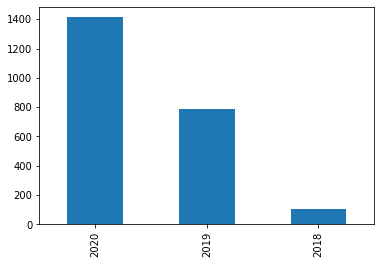

In [ ]:
#Trend of recieving funds
Funded_df['Year'].value_counts().plot(kind='bar')

In [ ]:
# Startups that has never recieved funds
set(Non_funded_df['Application Category'].value_counts().index.to_list()) - set(Funded_df['Application Category'].value_counts().index.to_list())

{'Art & Design',
 'Casino',
 'Dating',
 'Events',
 'Libraries & Demo',
 'Music',
 'Word'}

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


Text(0.5, 1.0, 'Top 10 categories')

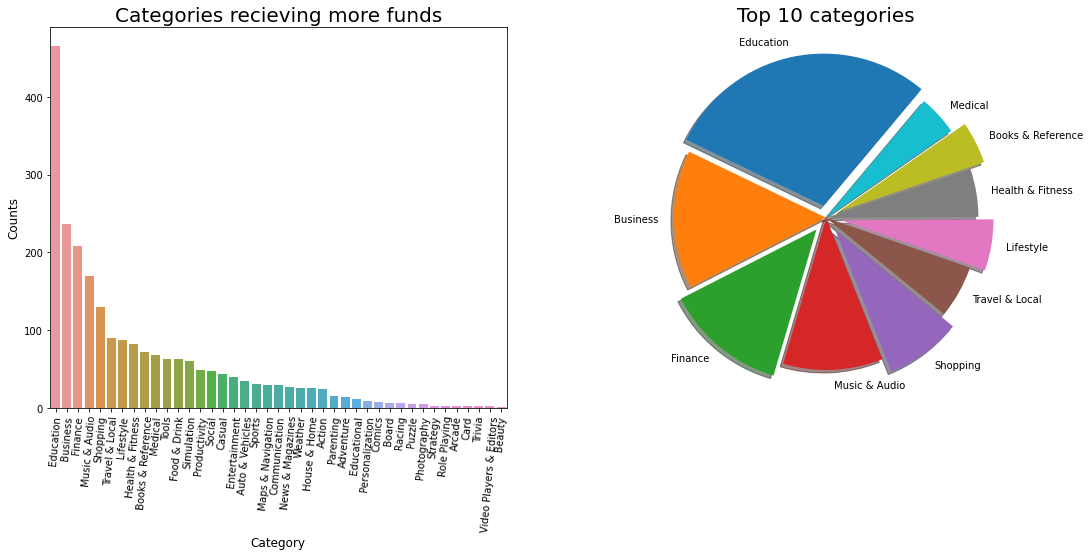

In [ ]:
# Category recieving more funds
plt.rcParams['figure.figsize'] = (18, 7)

a = pd.DataFrame(Funded_df['Application Category'].value_counts())
ax1 = plt.subplot(121)
sns.barplot(x=a.index, y= a['Application Category'] )
plt.xlabel('Category', fontsize = 12)
plt.xticks(rotation=85)
plt.ylabel('Counts', fontsize = 12)
ax1.set_title('Categories recieving more funds', fontsize = 20)

ax2 = plt.subplot(122)
explode =(0.08,0,0.1,0, 0.1,0,0.1,0, 0.1, 0)
plt.pie(a.sort_values(['Application Category'], ascending=False).head(10), labels=a.sort_values(['Application Category'], ascending=False).head(10).index, startangle=50, shadow = True, explode = explode)
ax2.set_title('Top 10 categories', fontsize = 20) 

In [ ]:
numerical = ['Avg_Session_Time', 'Open_Rate', 'Reach', 'Total_Session_Time']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  del sys.path[0]


Text(0.5, 1.0, 'Top 10 categories')

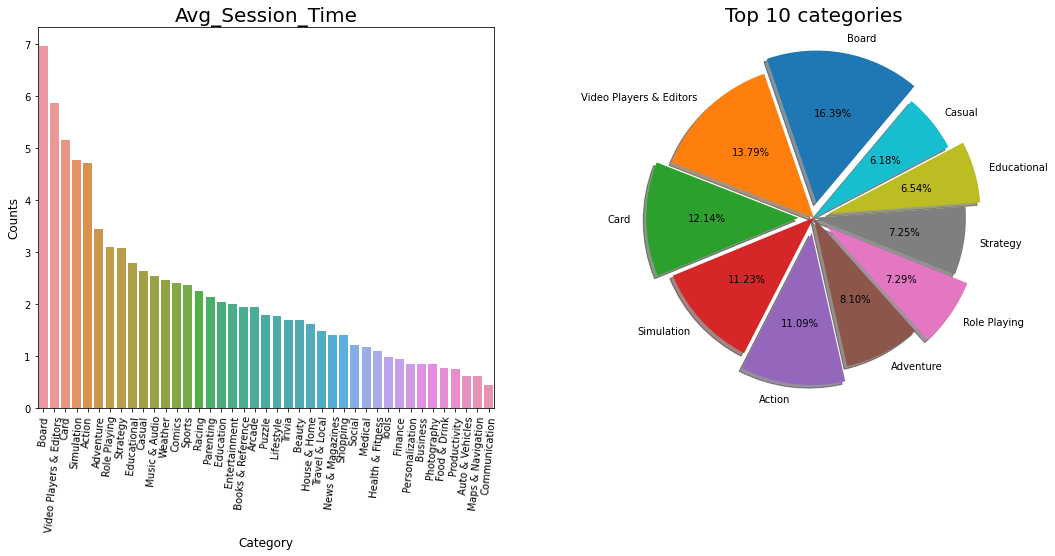

In [ ]:
for i in numerical:
  temp = pd.DataFrame(Funded_df.groupby(['Application Category'])['Avg_Session_Time'].mean())
  temp = temp.sort_values(['Avg_Session_Time'], ascending=False)

ax1 = plt.subplot(121)
sns.barplot(x=temp.index, y= temp['Avg_Session_Time'] )
plt.xlabel('Category', fontsize = 12)
plt.xticks(rotation=85)
plt.ylabel('Counts', fontsize = 12)
ax1.set_title('Avg_Session_Time', fontsize = 20)

ax2 = plt.subplot(122)
explode =(0.1,0,0.1,0, 0.1,0,0.1,0, 0.1, 0)
plt.pie(temp.head(10), labels=temp.head(10).index, startangle=50, shadow = True, explode = explode, autopct='%1.2f%%')
ax2.set_title('Top 10 categories', fontsize = 20) 

In [ ]:
Avg_Session_Time.sort_values(['Avg_Session_Time'], ascending=False)

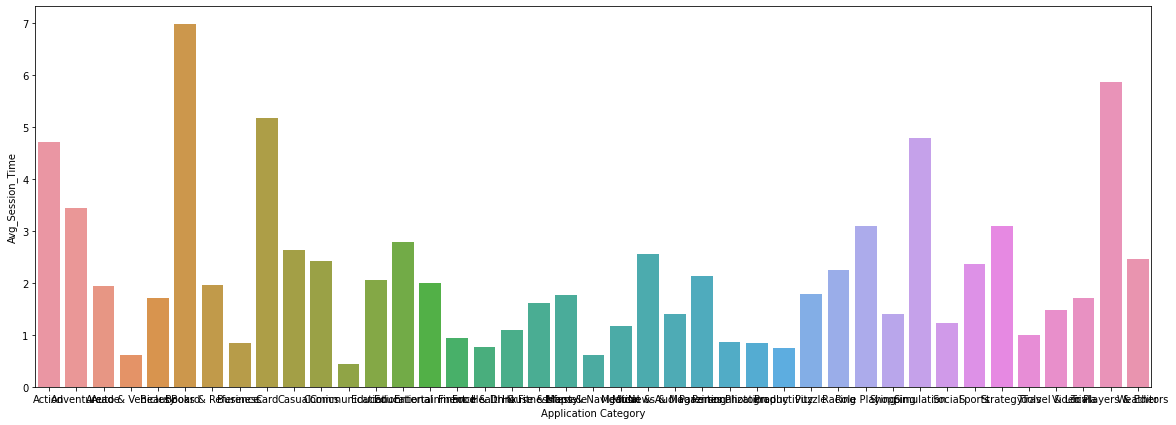

In [ ]:
sns.barplot(x=Avg_Session_Time.index, y = Avg_Session_Time['Avg_Session_Time'])